# Handwritten Digit Classification with CNN + Data Augmentation

This notebook trains a CNN on the MNIST dataset using data augmentation
and compares performance to a non-augmented baseline.

Steps:
1. Load MNIST
2. Apply augmentation (rotation, shift, zoom)
3. Train a CNN
4. Plot accuracy and loss
5. Generate predictions and confusion matrix

Imports:

In [2]:
from src.train import train, train_no_augmentation
from src.evaluate import plot_accuracy_comparison, plot_loss_comparison
from src.evaluate import plot_confusion_matrix_single, plot_confusion_matrices_side_by_side
from src.evaluate import show_example_predictions
from src.data import load_data

Train model without augmentation:

In [3]:
history_no_aug, model_no_aug = train_no_augmentation(epochs=5, batch_size=25)

Epoch 1/5
2400/2400 [==============================] - 90s 37ms/step - loss: 0.1111 - accuracy: 0.9659 - val_loss: 0.0414 - val_accuracy: 0.9865
Epoch 2/5
2400/2400 [==============================] - 110s 46ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0456 - val_accuracy: 0.9855
Epoch 3/5
2400/2400 [==============================] - 131s 55ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch 4/5
2400/2400 [==============================] - 110s 46ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 5/5
2400/2400 [==============================] - 113s 47ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0371 - val_accuracy: 0.9903
Model saved to: ../results/models/cnn_normal.keras


Train model with augmentation:

In [4]:
history_aug, model_aug = train(epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 138s 73ms/step - loss: 0.2181 - accuracy: 0.9318 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0786 - accuracy: 0.9754 - val_loss: 0.0342 - val_accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0235 - val_accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0279 - val_accuracy: 0.9907
Epoch 5/5
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0430 - val_accuracy: 0.9865
Model saved to: ../results/models/cnn_augmented.keras


Charts:

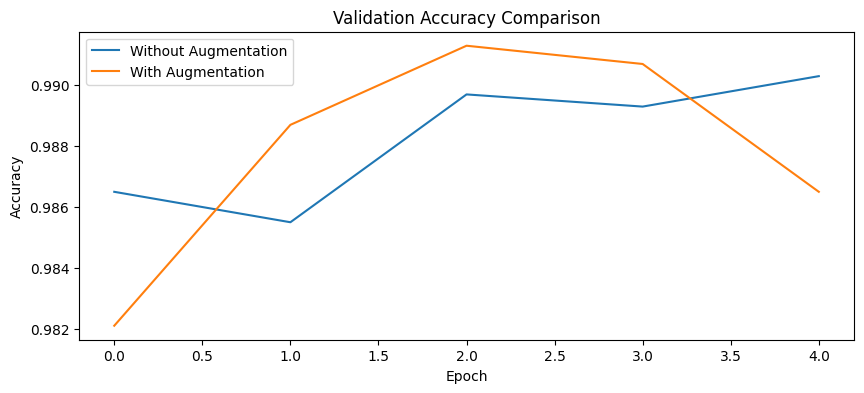

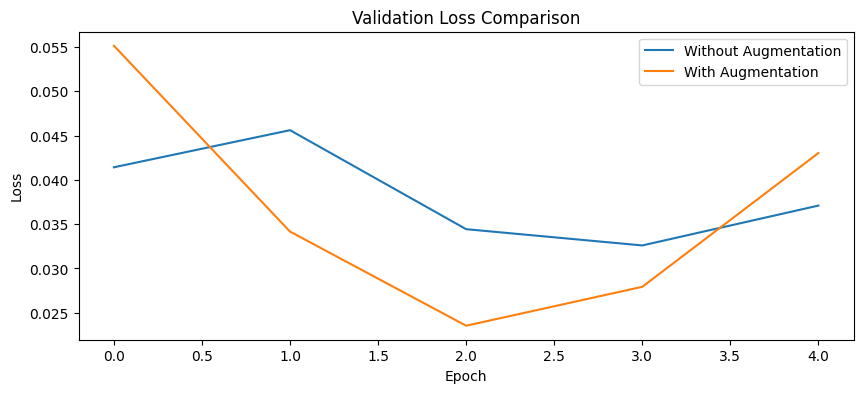

In [5]:
plot_accuracy_comparison(history_no_aug, history_aug)
plot_loss_comparison(history_no_aug, history_aug)

Output numbers:

In [6]:
print("Final validation accuracy:")
print("No augmentation:", history_no_aug.history['val_accuracy'][-1])
print("With augmentation:", history_aug.history['val_accuracy'][-1])

Final validation accuracy:
No augmentation: 0.9902999997138977
With augmentation: 0.9865000247955322


Confusion matrix:

313/313 [==============================] - 4s 11ms/step


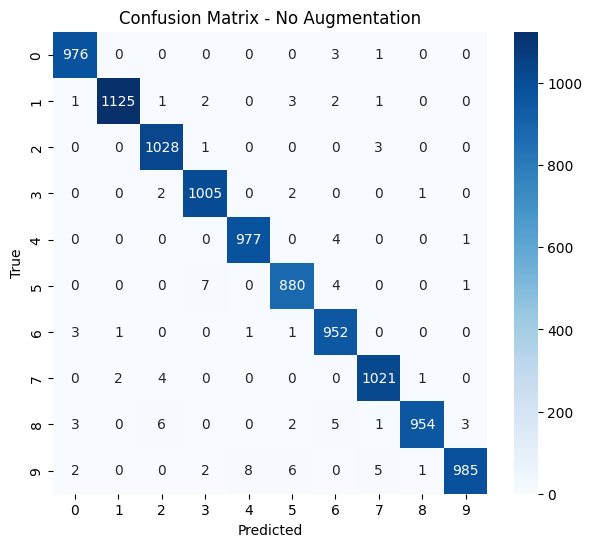

313/313 [==============================] - 4s 11ms/step


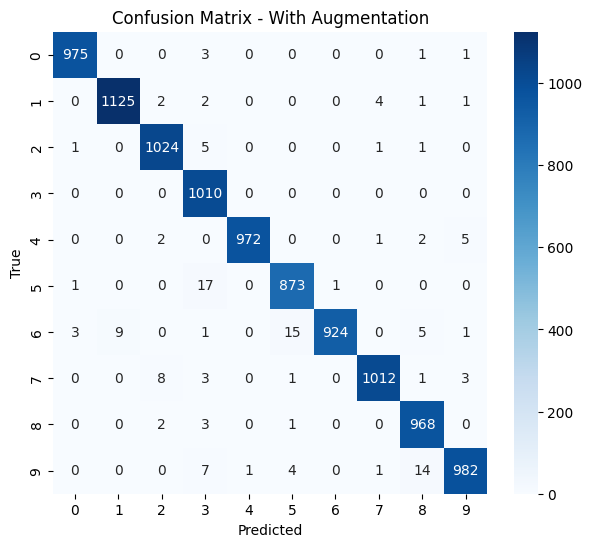

313/313 [==============================] - 3s 10ms/step


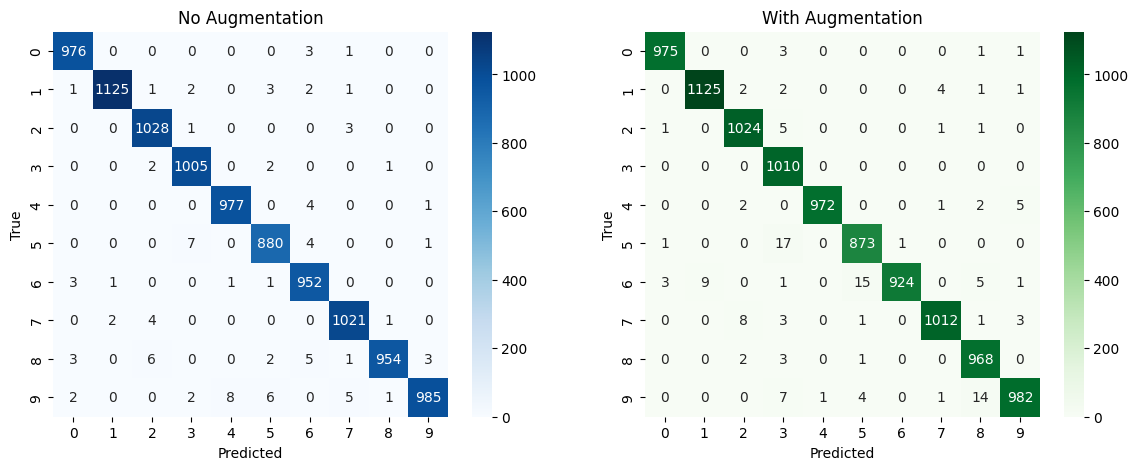

In [7]:
x_train, y_train, x_test, y_test = load_data()

plot_confusion_matrix_single(model_no_aug, x_test, y_test, title="Confusion Matrix - No Augmentation", save_path="../results/plots/cm_no_aug.png")

plot_confusion_matrix_single(model_aug, x_test, y_test, title="Confusion Matrix - With Augmentation", save_path="../results/plots/cm_aug.png")

plot_confusion_matrices_side_by_side(model_no_aug, model_aug, x_test, y_test)

Predict some examples:

1/1 [==============================] - 0s 29ms/step


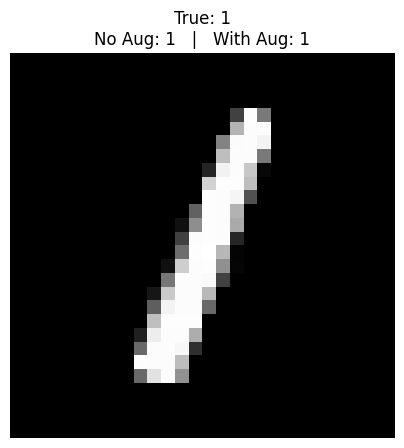

1/1 [==============================] - 0s 49ms/step


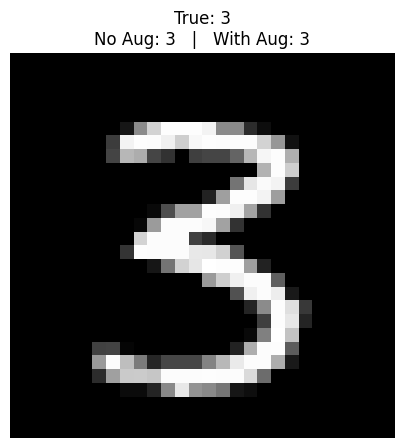

1/1 [==============================] - 0s 81ms/step


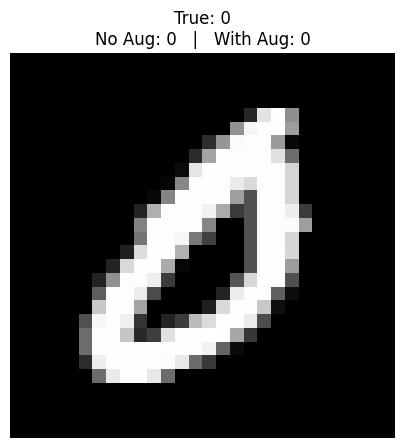

1/1 [==============================] - 0s 31ms/step


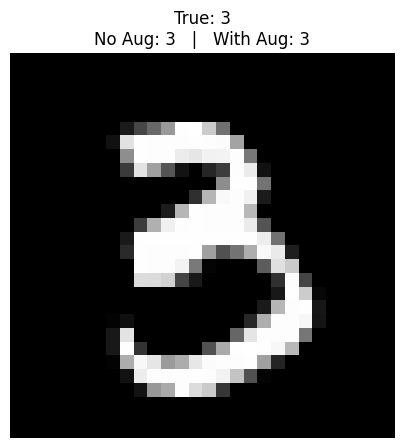

1/1 [==============================] - 0s 29ms/step


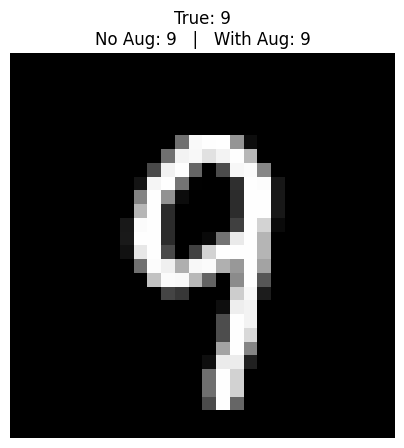

In [8]:
show_example_predictions(model_no_aug, model_aug, x_test, y_test, n=5)